In [1]:
import warnings
warnings.filterwarnings("ignore")
from lale.lib.lale import NoOp
from lale.lib.sklearn import KNeighborsClassifier
from lale.lib.sklearn import LogisticRegression
from lale.lib.sklearn import Nystroem
from lale.lib.sklearn import PCA
from lale.operators import make_union, make_choice, make_pipeline

#### Lale provides an `|` combinator or a function make_choice() to allow only one of its arguments to be applied at once in the overall pipeline. In this example, the first step of the pipeline is a choice between Nystroem and NoOp. This means that the data will either be transformed using Nystroem or will be left as is (NoOp is a transformer that does nothing). The second step in the pipeline is a PCA, and the third step is again a choice between two popular classifiers.

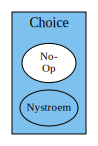

In [2]:
kernel_tfm_or_not =  NoOp | Nystroem
kernel_tfm_or_not.visualize()

In [3]:
tfm = PCA

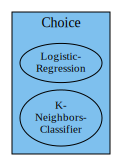

In [4]:
clf = make_choice(LogisticRegression, KNeighborsClassifier)
clf.visualize()

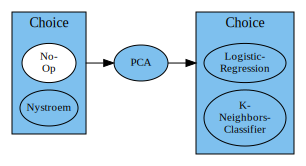

In [5]:
optimizable = kernel_tfm_or_not >> tfm >> clf
optimizable.visualize()

#### Use the graph to select the best performing model for a dataset. We use Iris dataset from sklearn for this demonstration. Hyperopt is used to scan the hyperparameter search space and select the best performing path from the above graph. 

In [6]:
from lale.lib.lale import Hyperopt
from lale.datasets import load_iris_df

(X_train, y_train), (X_test, y_test) = load_iris_df()

In [7]:
hpo_trainable = Hyperopt(estimator=optimizable, max_evals=3)
hpo_trained = hpo_trainable.fit(X_train, y_train)

100%|█████████| 3/3 [00:07<00:00,  2.64s/trial, best loss: -0.9416666666666667]


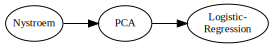

In [8]:
best_estimator = hpo_trained.get_pipeline()
best_estimator.visualize()

#### Look at the results from all trials and retrieve pipelines of other names or types.

In [9]:
hpo_trained.summary()

,tid,loss,time,log_loss,status
name,,,,,
p0,0,-0.583333,0.461873,1.955799,ok
p1,1,-0.941667,0.436148,0.249560,ok
p2,2,-0.791667,0.274112,0.390846,ok


In [10]:
worst_name = hpo_trained.summary().loss.argmax()
if not isinstance(worst_name, str): #newer pandas argmax returns index
    worst_name = hpo_trained.summary().index[worst_name]
print(worst_name)

p0


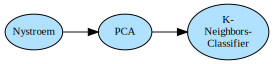

In [11]:
worst_estimator = hpo_trained.get_pipeline(worst_name)
worst_estimator.visualize()

In [12]:
worst_estimator_in_sklearn_format = hpo_trained.get_pipeline(worst_name, astype='sklearn')